# Trabajo Final de Machine Learning 2024-2025:

Evaluation
* Not based on the obtained results (potentially different difficulties in the tackled problems)
* Quality of the deliverables
* Methodology employed
* Analysis of the dataset
* Use of appropriate metrics
* Use of different techniques
* Encounter problems and how they were solved (if any)
* Understanding the datasets and the obtained results
* Etc.

Fechas:
* Tuesday November 12th before 11.59pm -> Deliverables (via ADI or email)
* Thursday November 14th in class at 9.15am -> Presentation

## Datos:

El dataset que se ha utilizado para este trabajo se ha obtenido de Kaggle, concretamente de la siguiente página: [https://www.kaggle.com/datasets/wisam1985/advanced-iot-agriculture-2024/data](https://www.kaggle.com/datasets/wisam1985/advanced-iot-agriculture-2024/data)

El conjunto de datos "Advanced_IoT_Dataset.csv" consta de 30,000 registros y 14 columnas. A continuación se detallan las descripciones de cada columna:

1. Random: Identificador aleatorio (3 tipos: R1, R2, R3).
    * Identificador para cada registro, indicando probablemente una muestra o lote aleatorio.

2. Average of chlorophyll in the plant (ACHP): Promedio de clorofila en la planta.
    * Contenido promedio de clorofila en la planta. La clorofila es esencial para la fotosíntesis y su medición puede indicar la salud y eficiencia de la planta para convertir energía lumínica en energía química.

3. Plant height rate (PHR): Tasa de altura de la planta.
    * Tasa de crecimiento en altura de la planta, esencial para comprender la dinámica de crecimiento vertical de la planta a lo largo del tiempo.

4. Average wet weight of the growth vegetative (AWWGV): Peso húmedo promedio del crecimiento vegetativo.
    * Peso húmedo promedio de las partes vegetativas de la planta, que puede indicar el contenido de agua y la biomasa total del crecimiento vegetativo de la planta.

5. Average leaf area of the plant (ALAP): Área foliar promedio de la planta.
    * Área foliar promedio de la planta, un factor crucial para la fotosíntesis, ya que determina la superficie disponible para la absorción de luz.

6. Average number of plant leaves (ANPL): Número promedio de hojas de la planta.
    * Número promedio de hojas por planta, que puede correlacionarse con la capacidad de la planta para realizar fotosíntesis y su salud general.

7. Average root diameter (ARD): Diámetro promedio de la raíz.
    * Diámetro promedio de las raíces de la planta, que puede afectar la capacidad de la planta para absorber agua y nutrientes del suelo.

8. Average dry weight of the root (ADWR): Peso seco promedio de la raíz.
    * Peso seco promedio de las raíces de la planta, que mide la biomasa de la planta sin contenido de agua e indica la capacidad estructural y de almacenamiento de la raíz.

9. Percentage of dry matter for vegetative growth (PDMVG): Porcentaje de materia seca del crecimiento vegetativo.
    * Porcentaje de materia seca en las partes vegetativas de la planta, que indica la proporción de biomasa que no es agua y es crucial para comprender su estructura y estado nutricional.

10. Average root length (ARL): Longitud promedio de la raíz.
    * Longitud promedio de las raíces de la planta, que influye en la capacidad de la planta para explorar y absorber nutrientes y agua del suelo.

11. Average wet weight of the root (AWWR): Peso húmedo promedio de la raíz.
    * Peso húmedo promedio de las raíces de la planta, que incluye el contenido de agua e indica la biomasa total y la capacidad de retención de agua.

12. Average dry weight of vegetative plants (ADWV): Peso seco promedio de plantas vegetativas.
    * Peso seco promedio de las partes vegetativas de la planta, que refleja la biomasa estructural de la planta sin contenido de agua.

13. Percentage of dry matter for root growth (PDMRG): Porcentaje de materia seca para el crecimiento de la raíz.
    * Porcentaje de materia seca en las raíces de la planta, importante para evaluar la salud y función de las raíces.

14. Class: Clase o categoría a la que pertenece el registro de la planta.
    * Columna categórica que indica la clase o categoría del registro de la planta, lo cual puede representar diferentes grupos o condiciones bajo las cuales las plantas fueron estudiadas o clasificadas.

In [3]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")

In [4]:
raw_data = pd.read_csv('DatasetML/Advanced_IoT_Dataset.csv')

raw_data.head(5)


Random   Average  of chlorophyll in the plant (ACHP)  \
0     R1                                     34.533468   
1     R1                                     34.489028   
2     R2                                     33.100405   
3     R1                                     34.498319   
4     R3                                     36.297008   

    Plant height rate (PHR)  \
0                 54.566983   
1                 54.567692   
2                 67.067344   
3                 54.559049   
4                 45.588894   

   Average wet weight of the growth vegetative (AWWGV)  \
0                                           1.147449     
1                                           1.149530     
2                                           1.104647     
3                                           1.137759     
4                                           1.363205     

   Average leaf area of the plant (ALAP)  \
0                            1284.229549   
1                            1284.247744   
2                            1009.208996   
3                            1284.227623   
4                             981.470310   

   Average number of plant leaves (ANPL)  Average root diameter (ARD)  \
0                               4.999713                    16.274918   
1                               5.024259                    16.269452   
2                               5.007652                    15.980760   
3                               4.991501                    16.276710   
4                               4.003682                    16.979894   

    Average dry weight of the root (ADWR)  \
0                                1.706810   
1                                1.700930   
2                                1.185391   
3                                1.716396   
4                                0.777428   

    Percentage of dry matter for vegetative growth (PDMVG)  \
0                                          18.399982         
1                                          18.398289         
2                                          19.398789         
3                                          18.413613         
4                                          31.423772         

   Average root length (ARL)  Average wet weight of the root (AWWR)  \
0                  19.739037                               2.949240   
1                  19.758836                               2.943137   
2                  20.840822                               2.861635   
3                  19.736098                               2.946784   
4                  17.331894                               2.766242   

    Average dry weight of vegetative plants (ADWV)  \
0                                         0.209251   
1                                         0.216154   
2                                         0.200113   
3                                         0.223092   
4                                         0.424172   

   Percentage of dry matter for root growth (PDMRG) Class  
0                                         57.633906    SA  
1                                         57.633697    SA  
2                                         41.289875    SA  
3                                         57.645661    SA  
4                                         27.898619    SA

In [5]:
raw_data.describe()

Average  of chlorophyll in the plant (ACHP)   Plant height rate (PHR)  \
count                                  30000.000000              30000.000000   
mean                                      38.060575                 59.020331   
std                                        4.441682                 11.985213   
min                                       32.664004                 37.020398   
25%                                       34.399604                 51.059436   
50%                                       36.575753                 55.912058   
75%                                       42.300836                 67.069465   
max                                       46.431668                 77.040610   

       Average wet weight of the growth vegetative (AWWGV)  \
count                                       30000.000000     
mean                                            1.247257     
std                                             0.245989     
min                                             0.848351     
25%                                             1.064865     
50%                                             1.211328     
75%                                             1.501692     
max                                             1.775383     

       Average leaf area of the plant (ALAP)  \
count                           30000.000000   
mean                             1063.639833   
std                               260.712823   
min                               658.488225   
25%                               875.501356   
50%                              1009.249081   
75%                              1243.866525   
max                              1751.031654   

       Average number of plant leaves (ANPL)  Average root diameter (ARD)  \
count                           30000.000000                 30000.000000   
mean                                3.944789                    16.285792   
std                                 0.702537                     2.882793   
min                                 2.959173                    11.075737   
25%                                 3.013099                    13.933350   
50%                                 3.998577                    16.248496   
75%                                 4.015829                    18.202577   
max                                 5.037358                    23.325870   

        Average dry weight of the root (ADWR)  \
count                            30000.000000   
mean                                 1.000981   
std                                  0.456292   
min                                  0.241972   
25%                                  0.675892   
50%                                  0.833799   
75%                                  1.313504   
max                                  2.196556   

        Percentage of dry matter for vegetative growth (PDMVG)  \
count                                       30000.000000         
mean                                           22.674553         
std                                             9.571091         
min                                             8.021505         
25%                                            14.980983         
50%                                            21.954006         
75%                                            27.711471         
max                                            43.660373         

       Average root length (ARL)  Average wet weight of the root (AWWR)  \
count               30000.000000                           30000.000000   
mean                   18.071061                               2.907011   
std                     2.932830                               1.361928   
min                    12.359924                               1.126715   
25%                    15.600294                               1.911408   
50%                    18.477019                               2.818611   
75%                    20.3652

<Figure size 1200x1200 with 0 Axes>

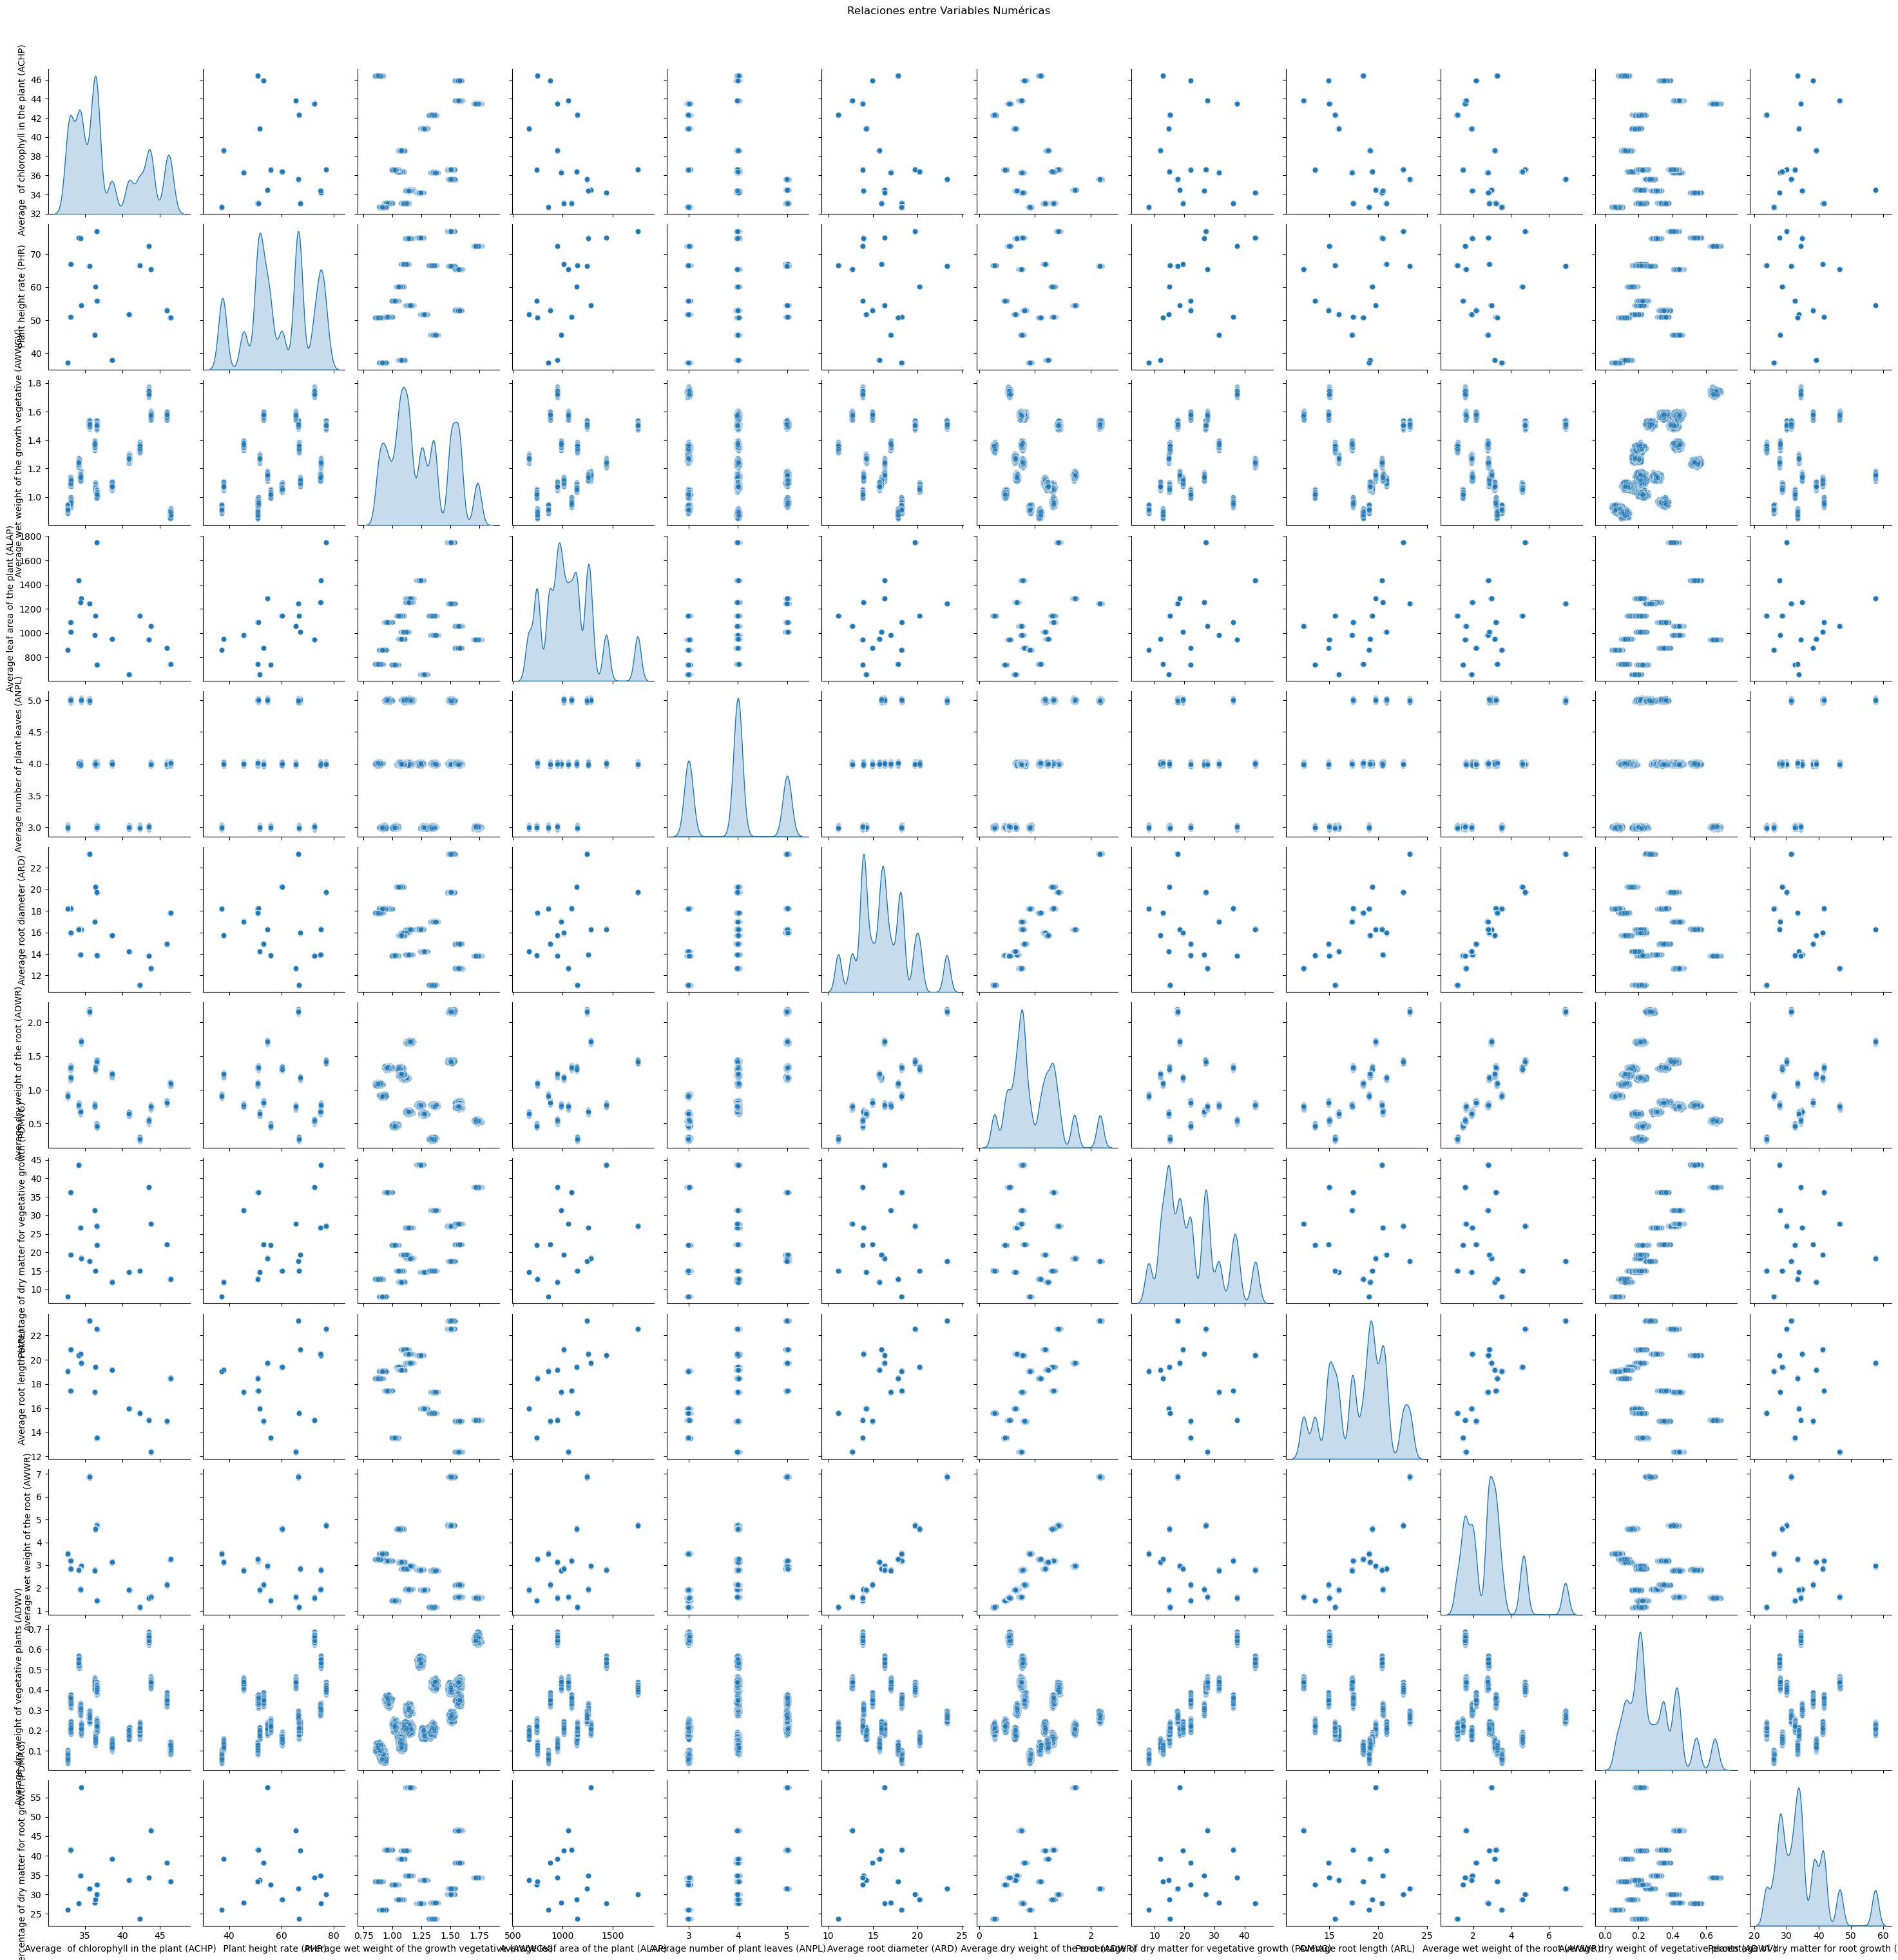

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de pares para todas las variables numéricas
plt.figure(figsize=(12, 12))
sns.pairplot(raw_data, diag_kind='kde', plot_kws={'alpha': 0.5})

plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()


<Figure size 1200x1200 with 0 Axes>

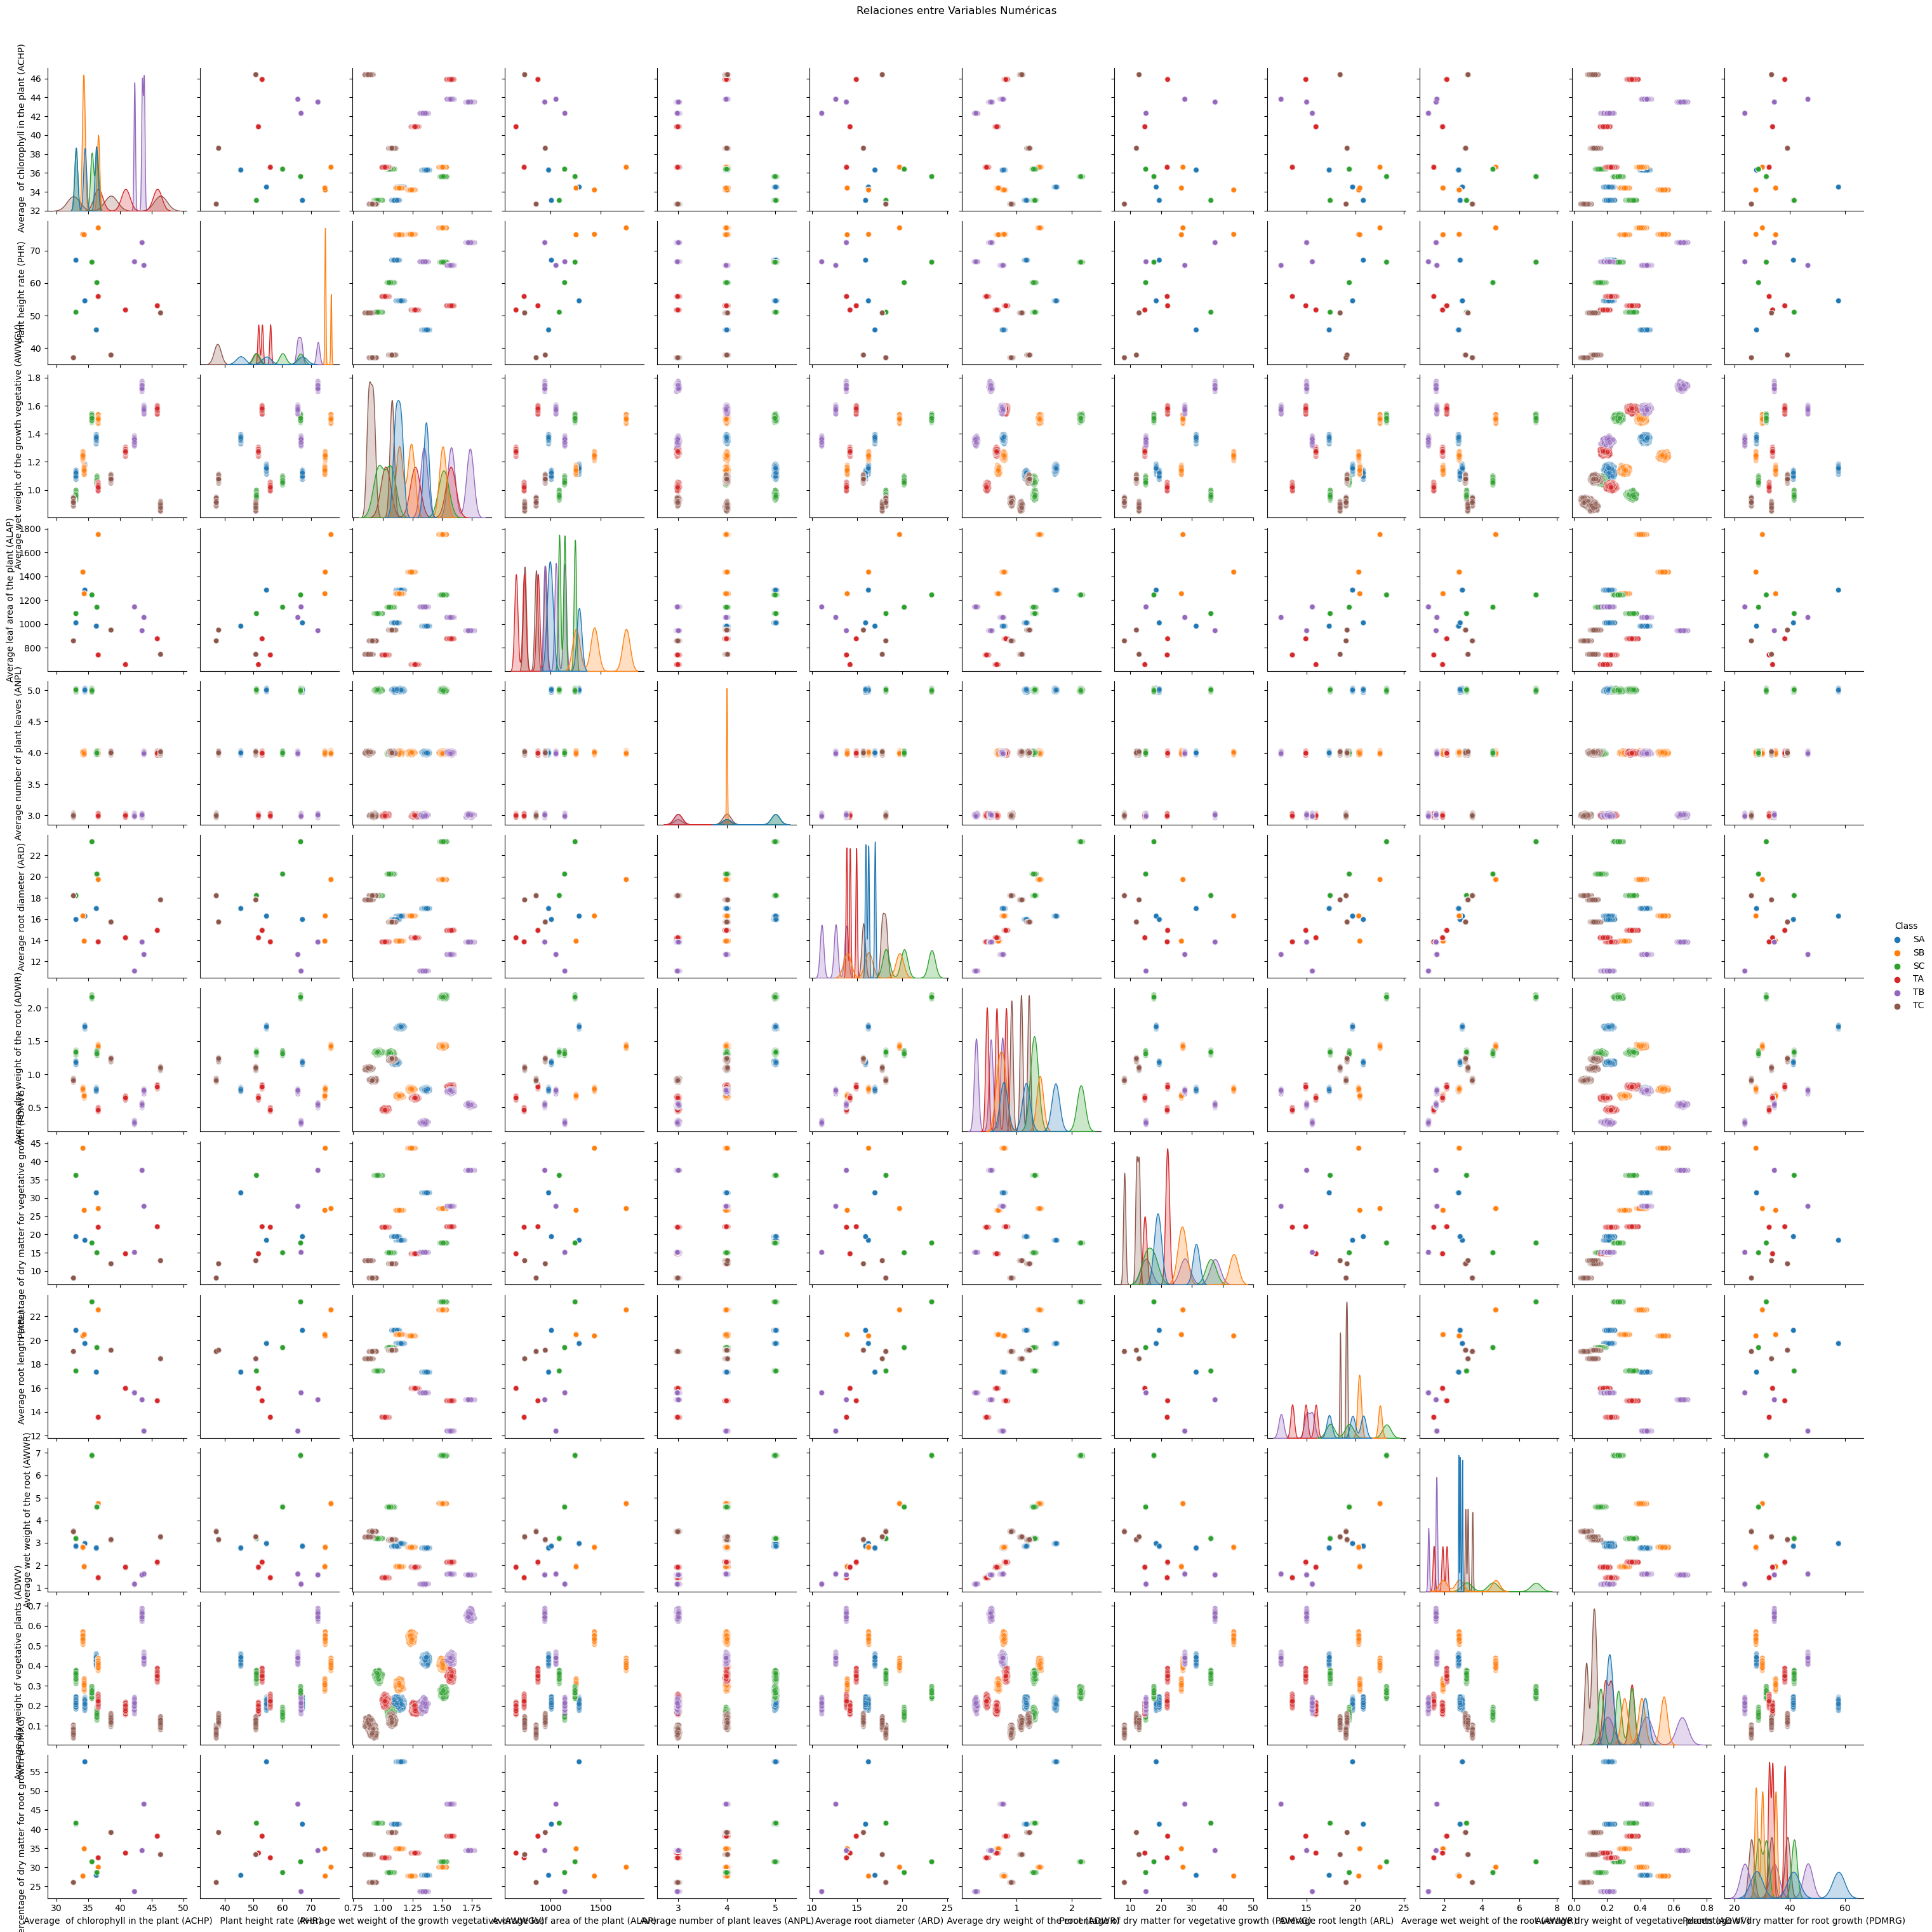

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de pares para todas las variables numéricas
plt.figure(figsize=(12, 12))
sns.pairplot(raw_data, diag_kind='kde', plot_kws={'alpha': 0.5}, hue='Class')

plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()


<Figure size 1200x1200 with 0 Axes>

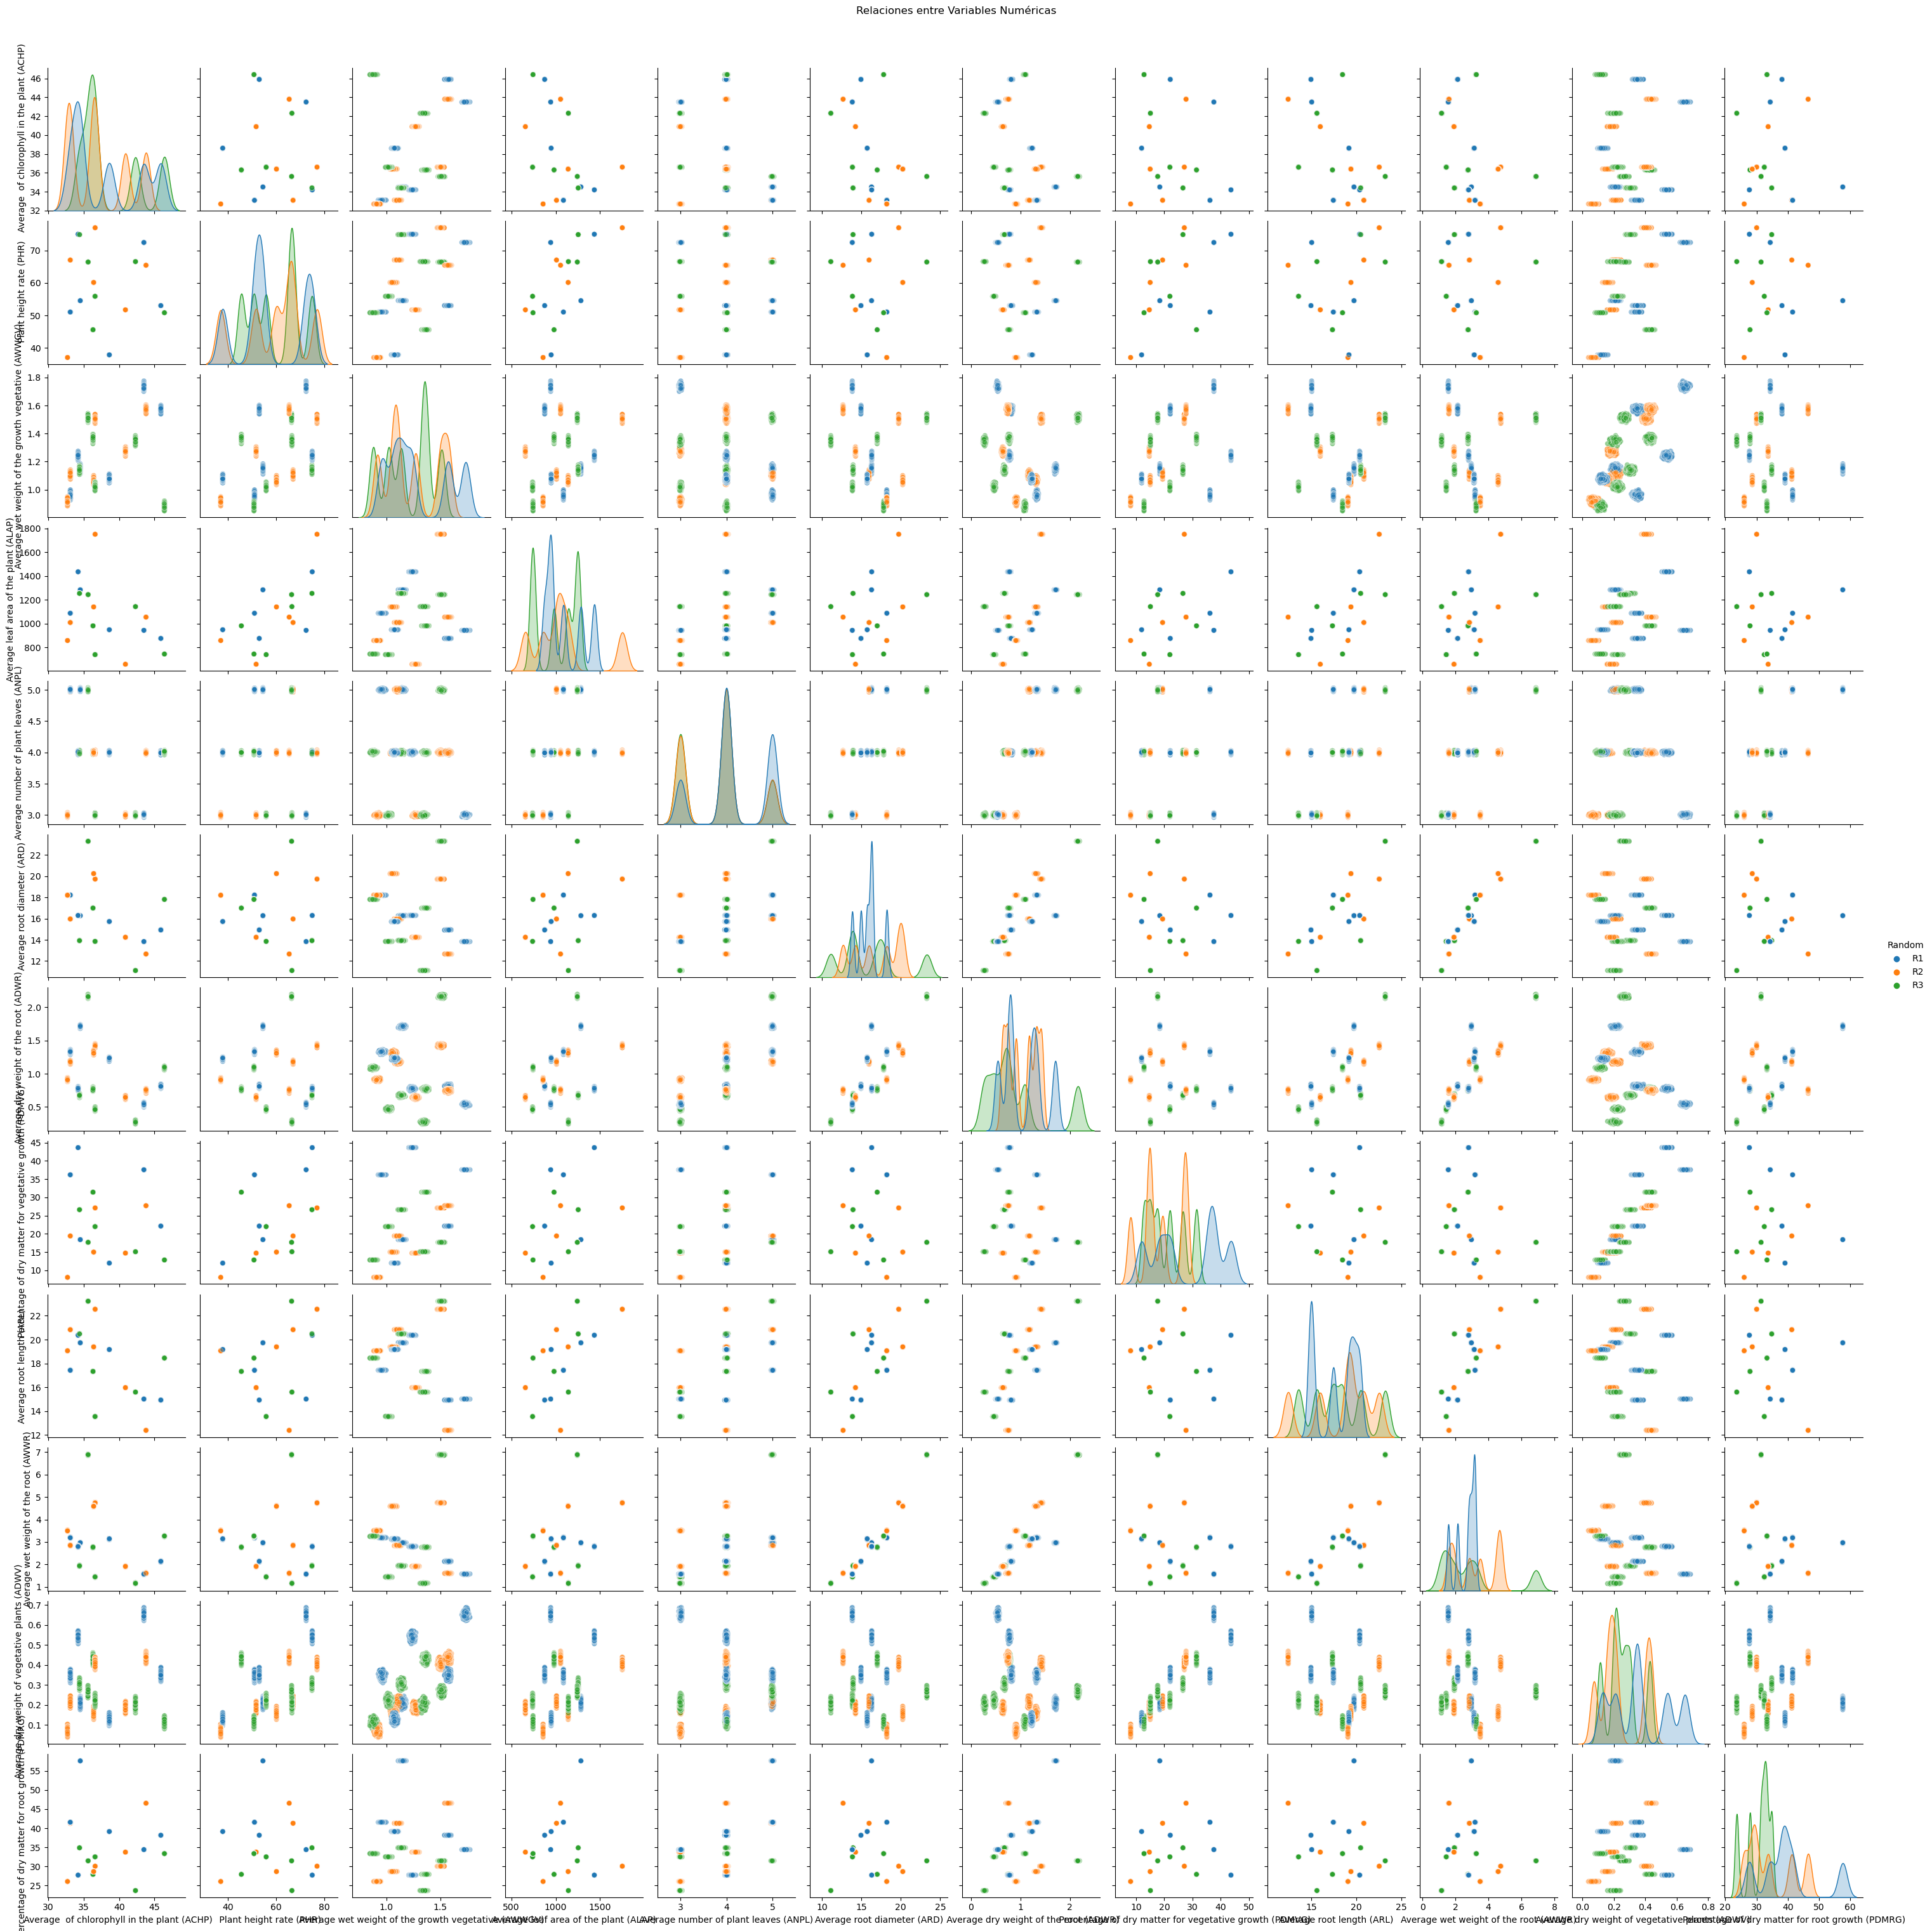

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de pares para todas las variables numéricas
plt.figure(figsize=(12, 12))
sns.pairplot(raw_data, diag_kind='kde', plot_kws={'alpha': 0.5}, hue='Random')

plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()

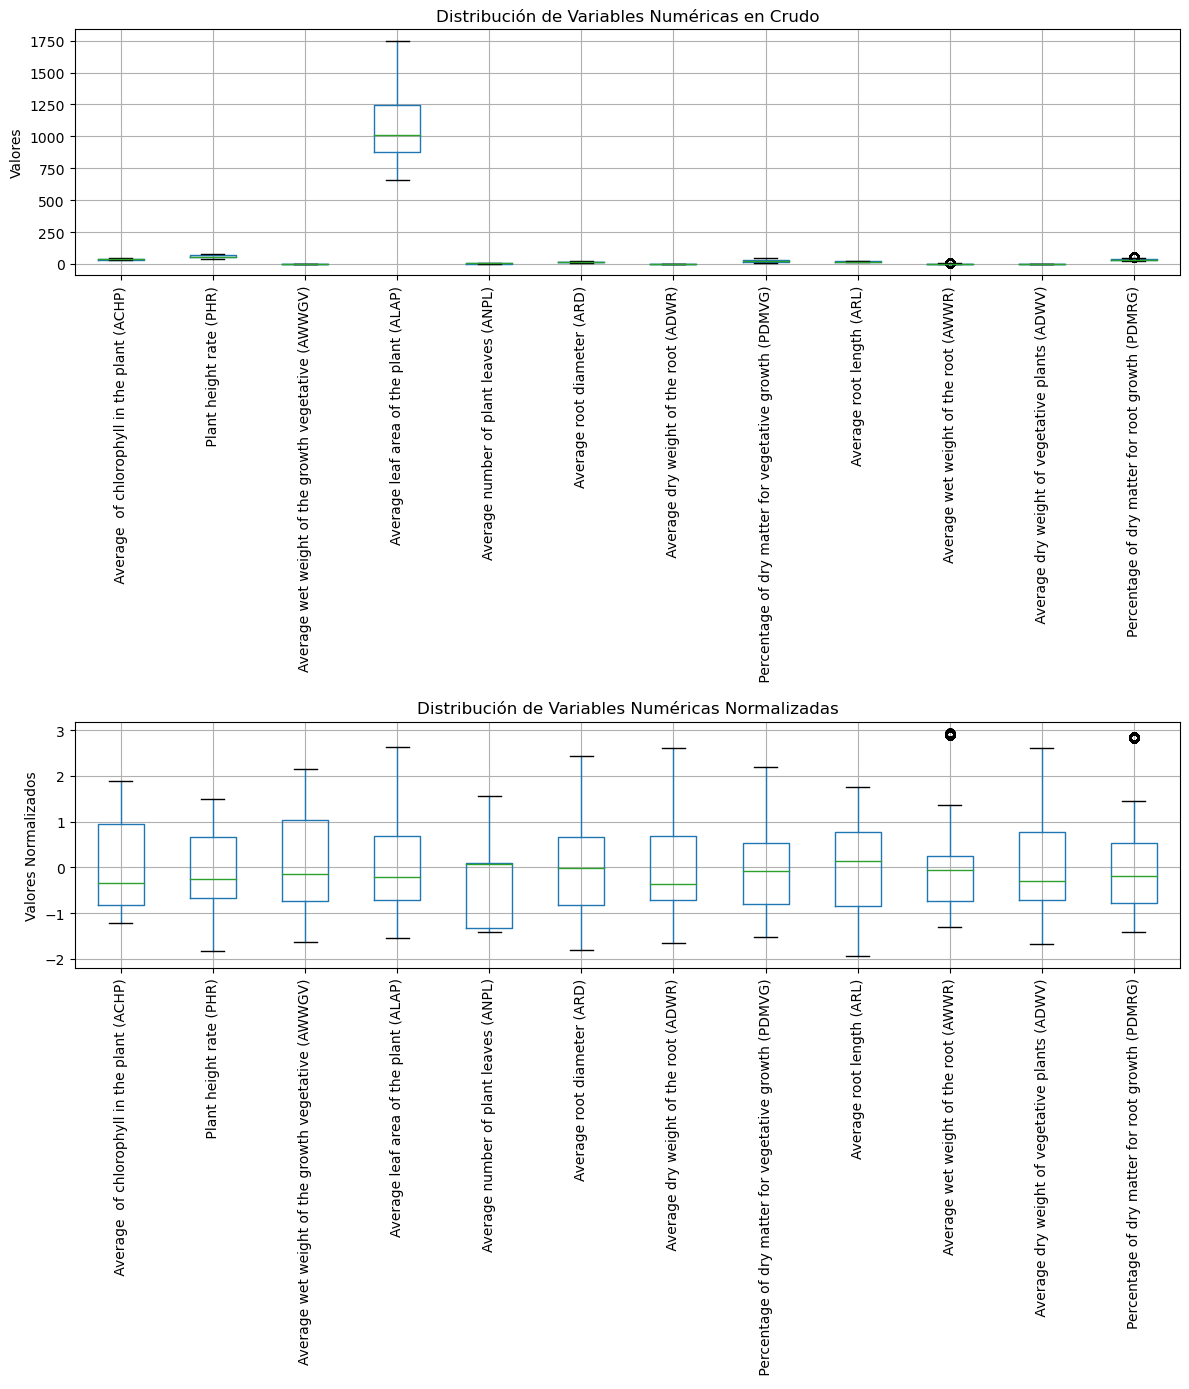

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

numeric_columns = raw_data.describe().columns  # Seleccionar las columnas numéricas a partir de describe()

# Normalizar los datos
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(raw_data[numeric_columns]), columns=numeric_columns)

# Crear subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 14))

# Gráfico boxplot con datos en crudo
raw_data[numeric_columns].boxplot(ax=axs[0])
axs[0].set_title("Distribución de Variables Numéricas en Crudo")
axs[0].set_xticklabels(numeric_columns, rotation=90)
axs[0].set_ylabel("Valores")
axs[0].grid(True)
#axs[0].set_ylim(-200, 800)

# Gráfico boxplot con datos normalizados
data_normalized.boxplot(ax=axs[1])
axs[1].set_title("Distribución de Variables Numéricas Normalizadas")
axs[1].set_xticklabels(numeric_columns, rotation=90)
axs[1].set_ylabel("Valores Normalizados")
axs[1].grid(True)
#axs[1].set_ylim(-10, 10) #Se han cortado muchos outliers 

# Ajustar el layout
plt.tight_layout()
plt.show()

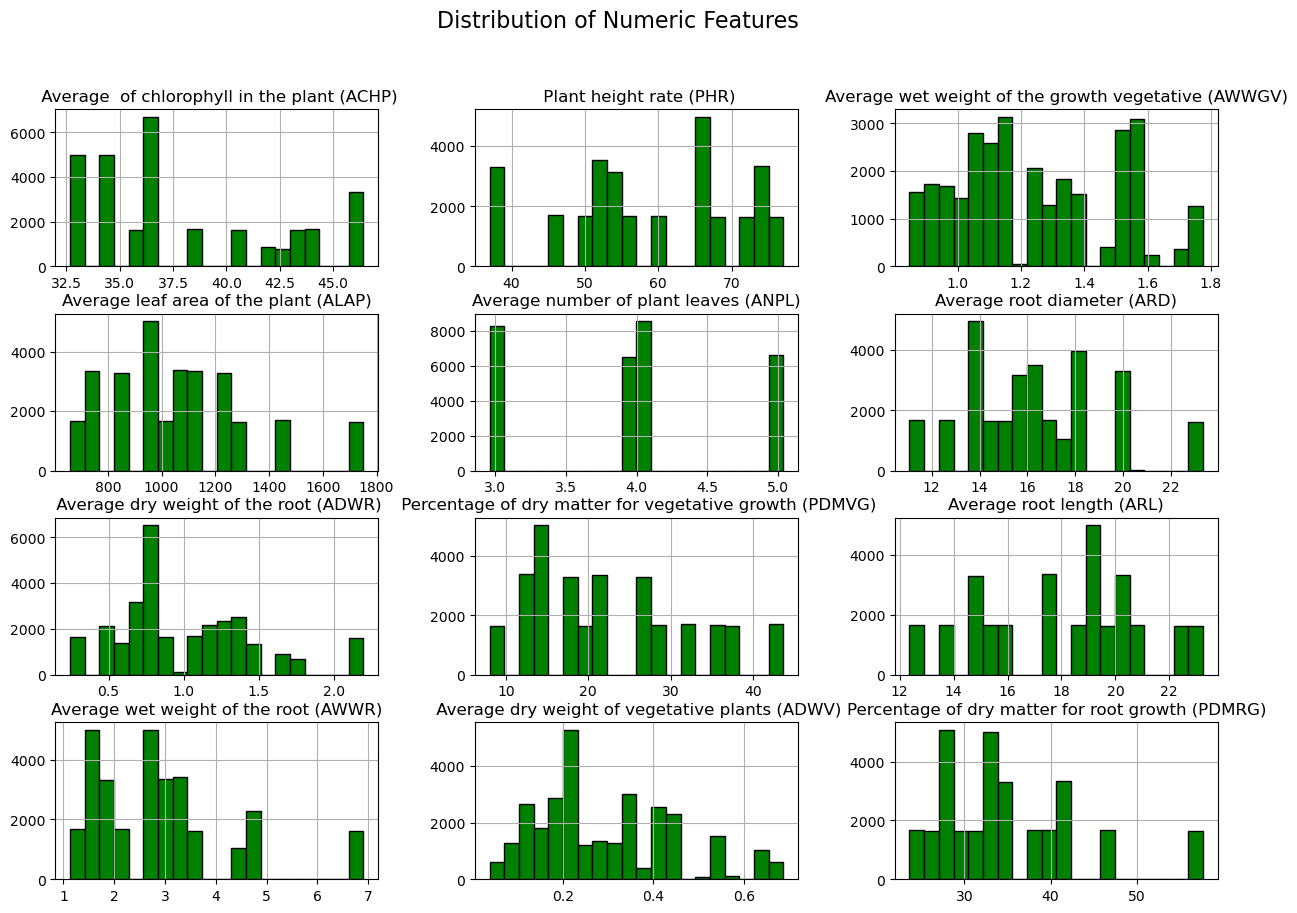

In [10]:
raw_data[numeric_columns].hist(bins=20, figsize=(15, 10), color='Green', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

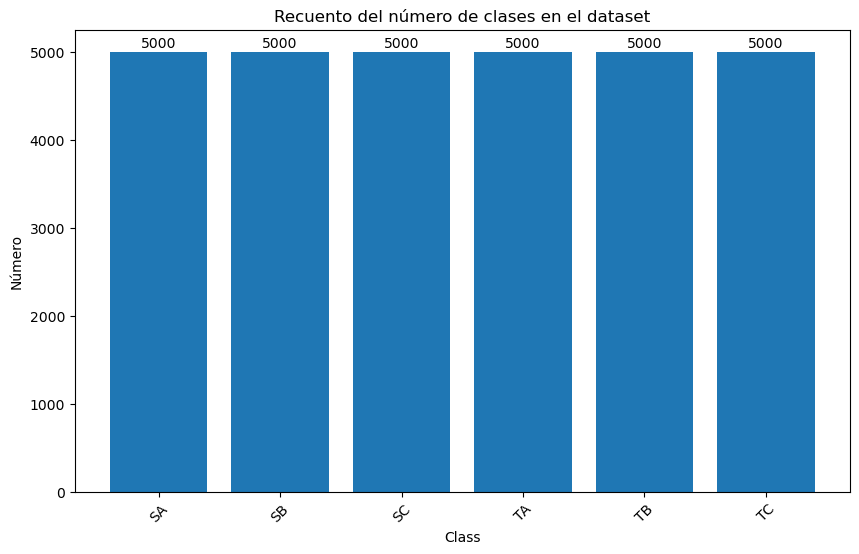

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de registros en cada clase
class_counts = raw_data['Class'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values)

# Añadir etiquetas encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel("Class")
plt.ylabel("Número")
plt.title("Recuento del número de clases en el dataset")
plt.xticks(rotation=45)
plt.show()


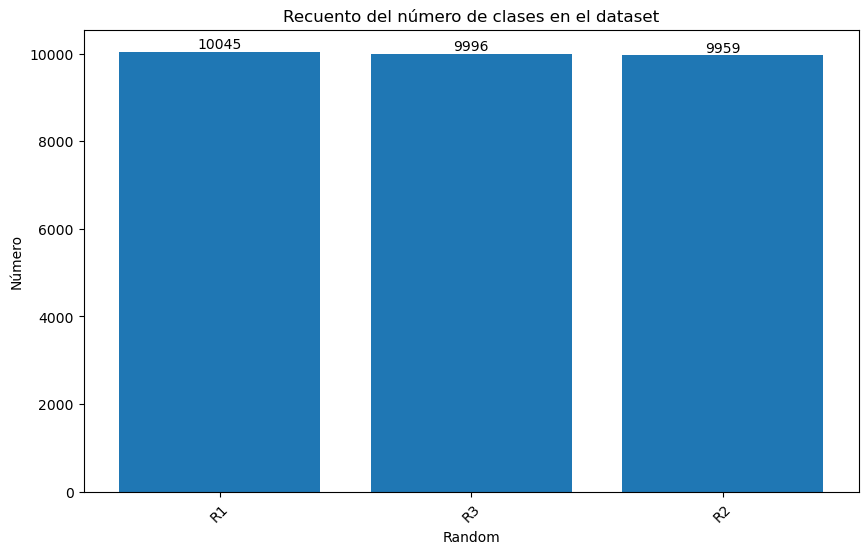

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de registros en cada clase
class_counts = raw_data['Random'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values)

# Añadir etiquetas encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel("Random")
plt.ylabel("Número")
plt.title("Recuento del número de clases en el dataset")
plt.xticks(rotation=45)
plt.show()


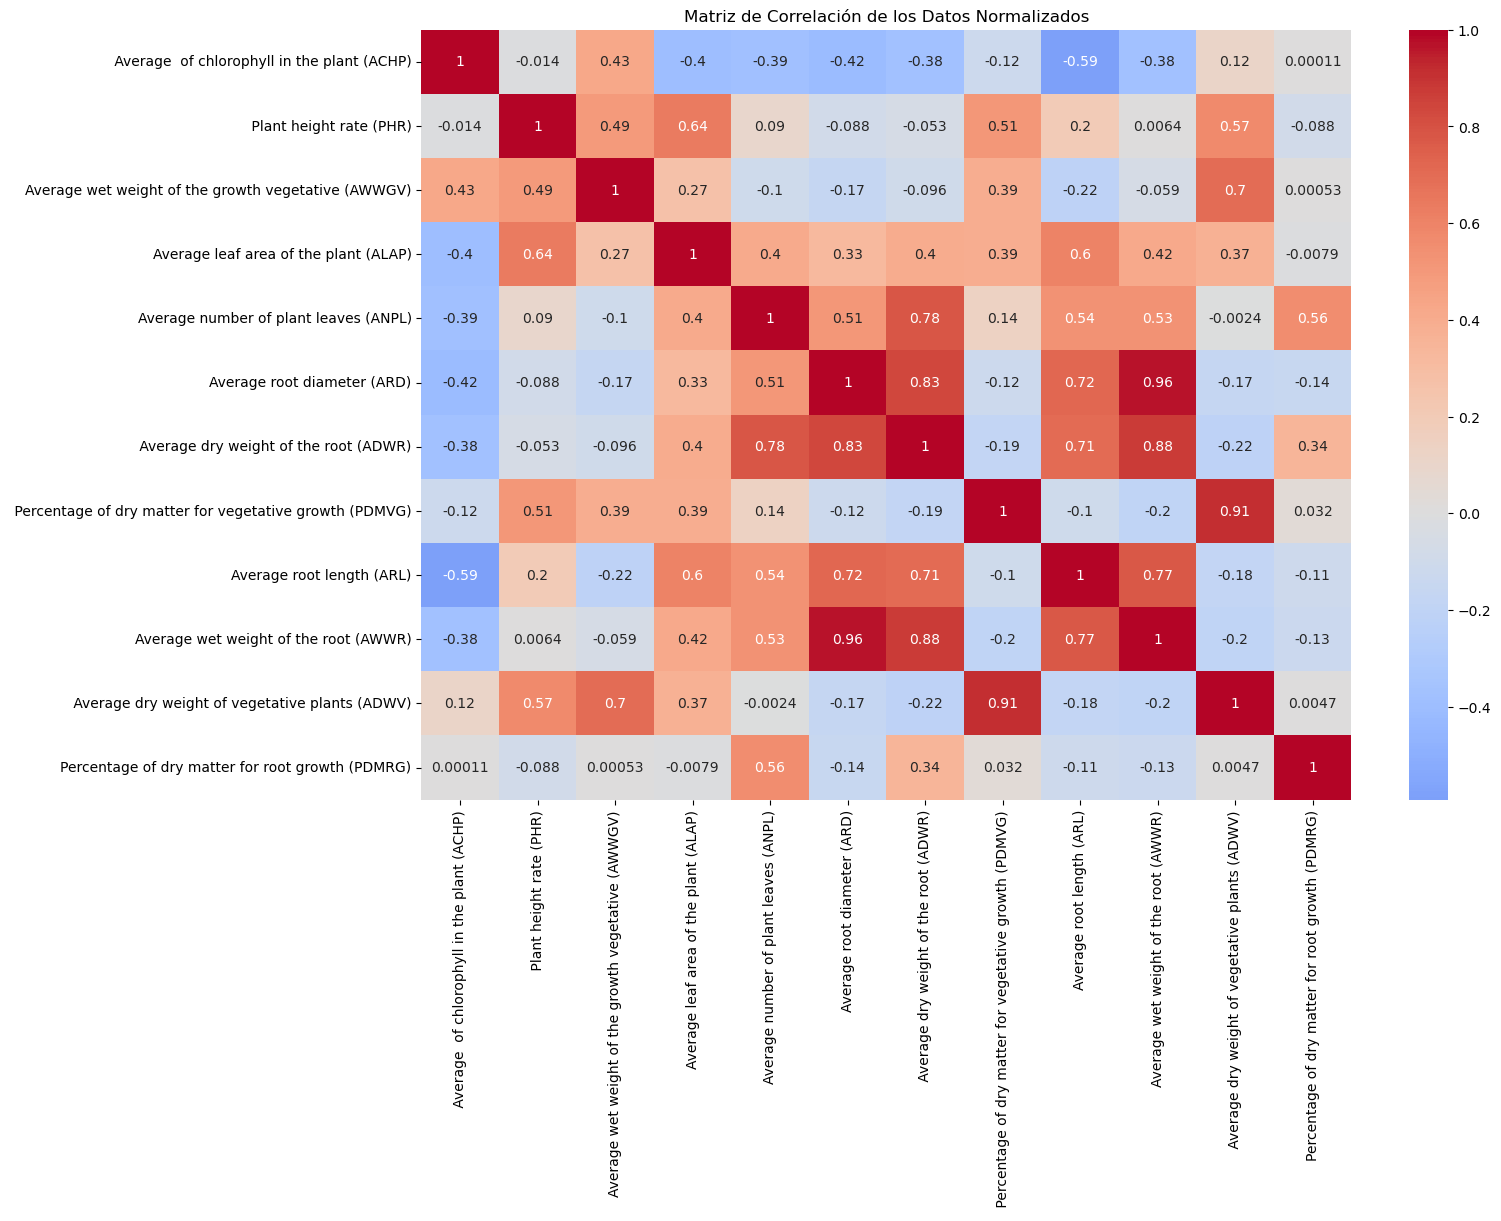

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Filtrar solo las columnas numéricas
numerical_data = raw_data.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos (usando StandardScaler para estandarización)
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Crear un DataFrame de los datos normalizados, usando los mismos nombres de columnas
numerical_data_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)

# Calcular la matriz de correlación
correlation_matrix = numerical_data_normalized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de los Datos Normalizados")
plt.show()


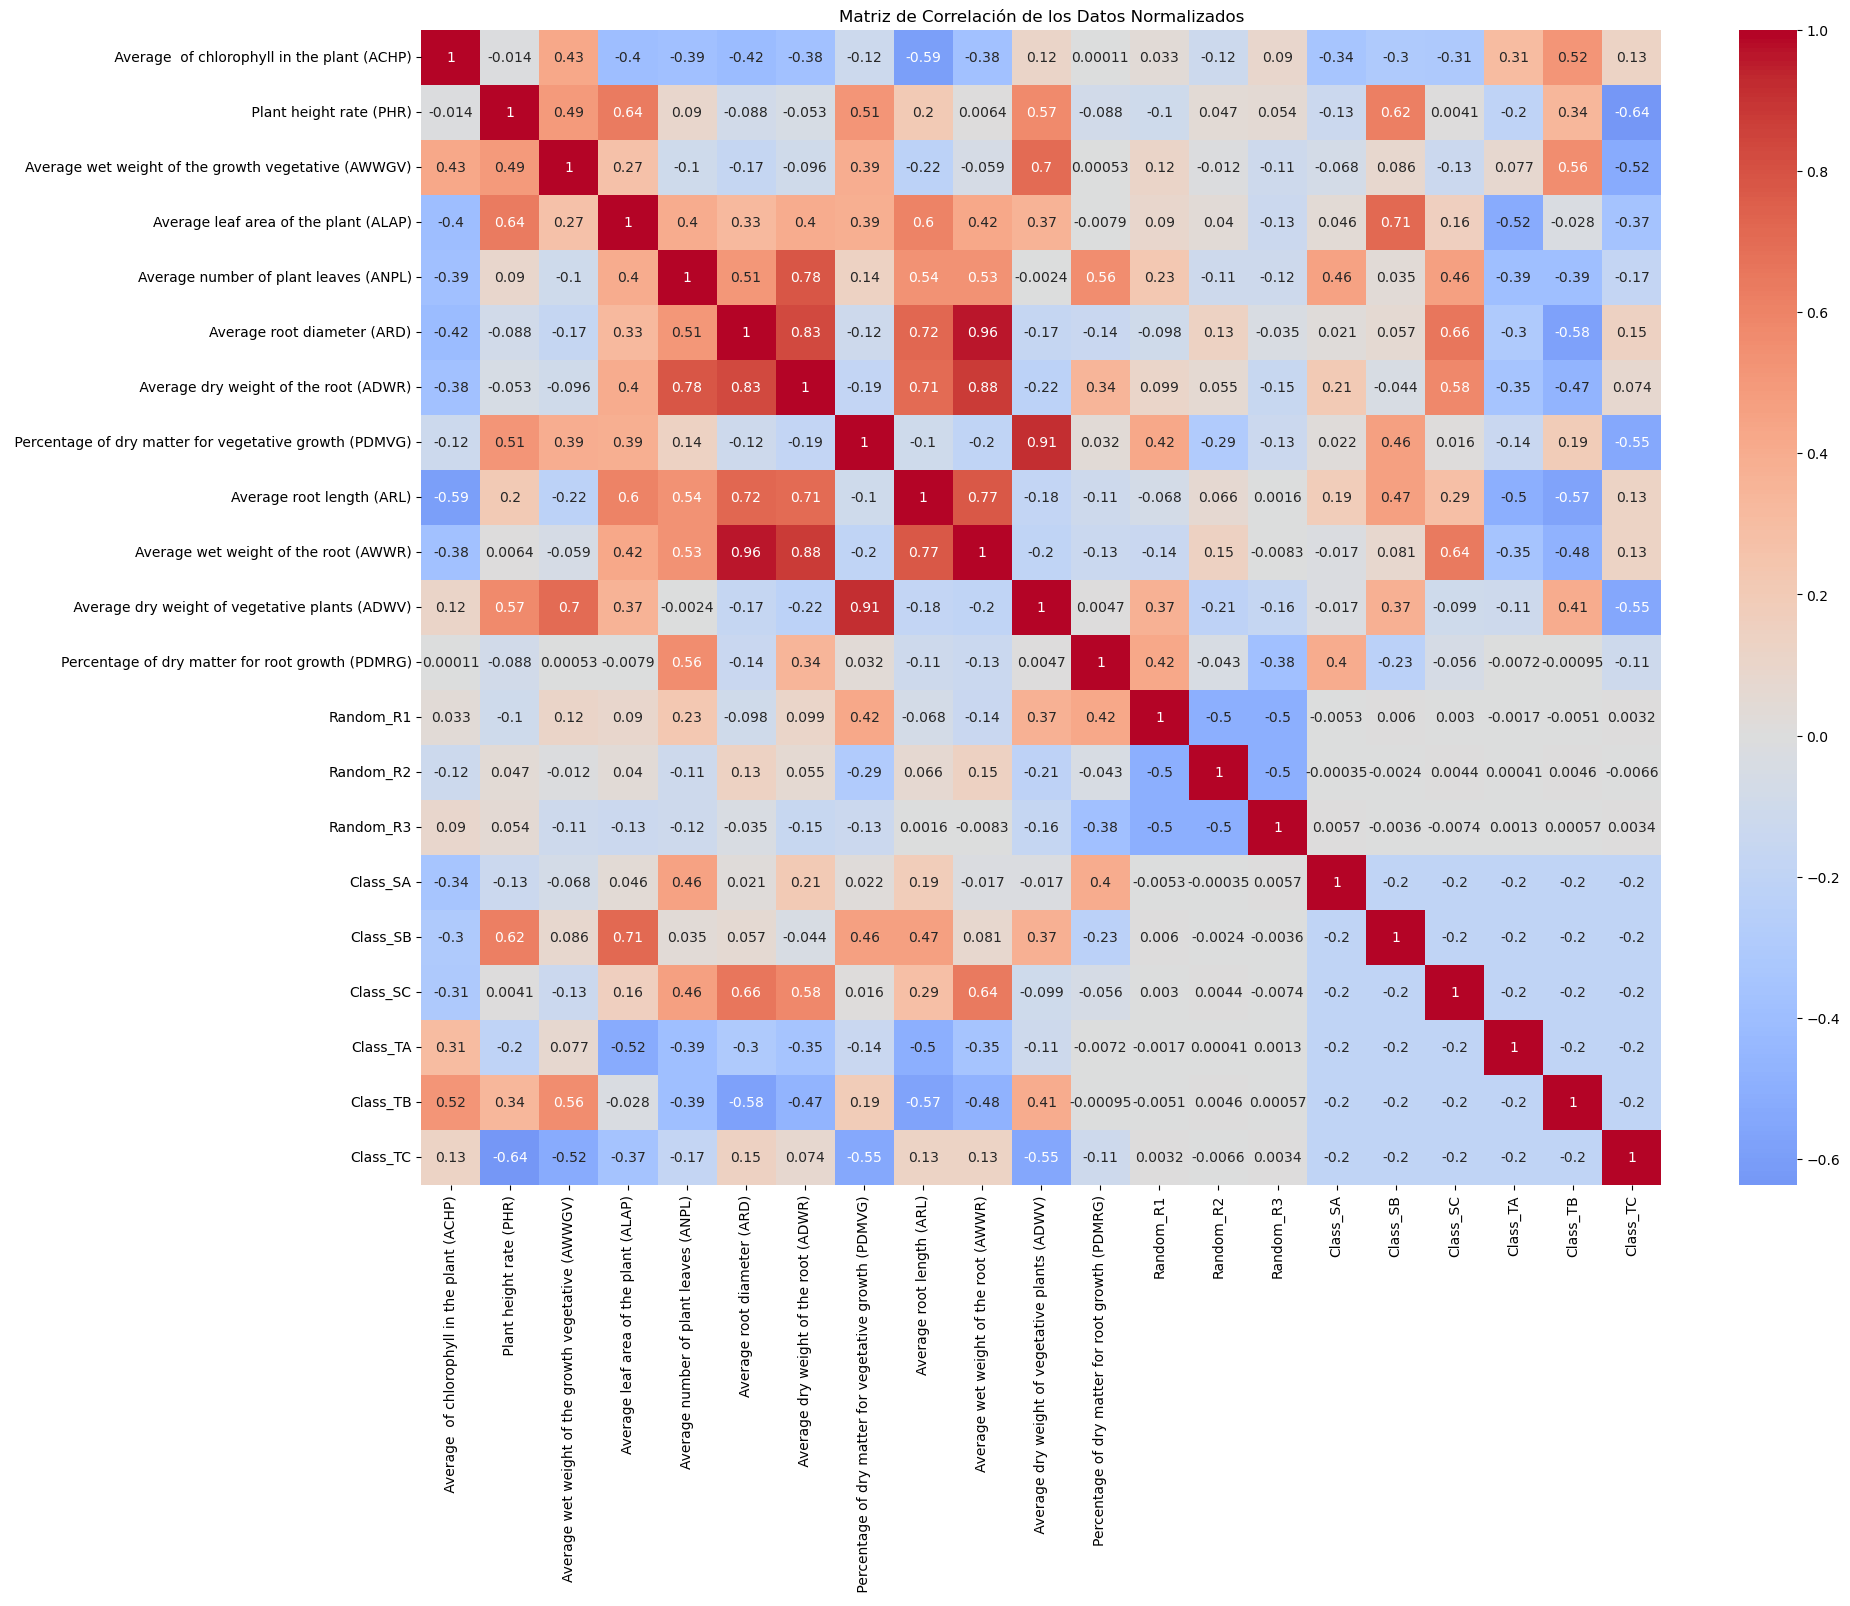

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el DataFrame original
# raw_data = pd.read_csv('nombre_del_archivo.csv')  # Ejemplo de carga de datos

# Aplicar one-hot encoding a las columnas categóricas
encoded_data = pd.get_dummies(raw_data, drop_first=False)  # Codifica las columnas categóricas

# Asegurarse de que todas las columnas sean numéricas (conversión de True/False a 1/0)
encoded_data = encoded_data.astype(float)

# Filtrar solo las columnas numéricas para la normalización
numerical_data = encoded_data.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos usando StandardScaler
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Crear un DataFrame de los datos normalizados, usando los mismos nombres de columnas
numerical_data_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)

# Calcular la matriz de correlación de los datos normalizados
correlation_matrix = numerical_data_normalized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de los Datos Normalizados")
plt.show()


## Feature Selection

## Feature Engineering

In [15]:
# Cmabiar el nombre a algunas variables, tienen espacios antes del nombre y puede ser un problema.

## PCA:

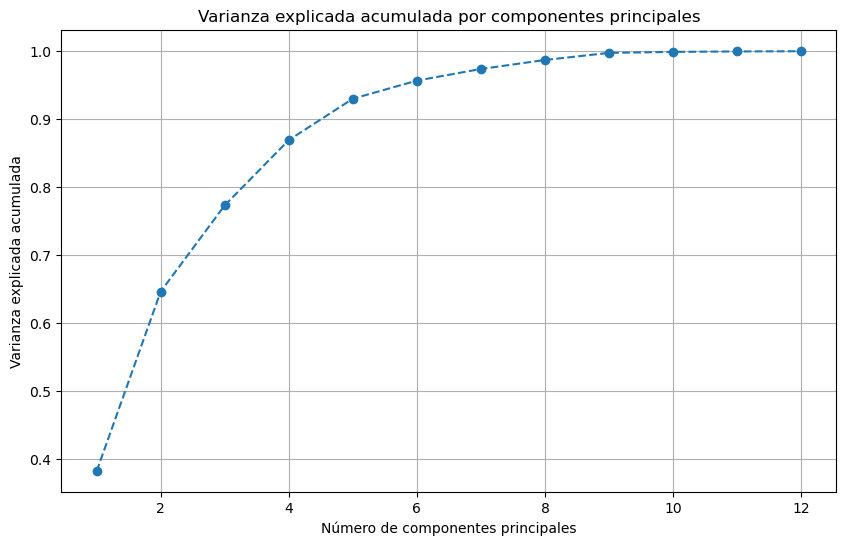

array([3.82465211e-01, 2.64108814e-01, 1.26845297e-01, 9.58667549e-02,
       6.08757288e-02, 2.66313533e-02, 1.71119267e-02, 1.32020865e-02,
       1.04685604e-02, 1.42802222e-03, 6.68889227e-04, 3.27355785e-04])

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas para PCA
numeric_columns = raw_data.select_dtypes(include=['float64']).columns

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_data[numeric_columns])

# Realizar PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_data)

# Calcular la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

explained_variance_ratio


In [21]:
# Reducir los datos a 10 componentes principales
pca_10 = PCA(n_components=10)
reduced_data = pca_10.fit_transform(scaled_data)

# Crear un nuevo DataFrame con los 10 componentes
pca_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(10)])

# Mostrar las primeras filas del nuevo DataFrame
pca_df.head()


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.128633  0.345282  2.947080 -0.519761 -0.919096 -0.685906 -0.276878   
1  2.132367  0.314597  2.961008 -0.527536 -0.903713 -0.684076 -0.273034   
2  1.495360  0.282803  1.023119 -1.058865 -0.813890  0.373092  0.898949   
3  2.129687  0.315194  2.950275 -0.538917 -0.881608 -0.678304 -0.283788   
4 -0.458654 -0.432596 -0.461103 -0.201229  1.732315 -0.411042 -0.290813   

        PC8       PC9      PC10  
0  0.237638  0.342758 -0.016522  
1  0.209626  0.334676 -0.035623  
2 -0.644229 -0.185479 -0.100225  
3  0.253843  0.381554 -0.012852  
4 -0.658816 -0.358103 -0.114195

## División de los datos

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = raw_data.drop(['Class','Random'], axis=1)
y = raw_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [39]:
y.unique()

array(['SA', 'SB', 'SC', 'TA', 'TB', 'TC'], dtype=object)

## Modelos

- PCA (Luis)
- Logistic Regression (Luis)
- SVM (Jaime)
- Random Forest (Luis)
- Decission Tree (Boosting) (Jaime)
- Enssemble Models (Final)
- UMAP (Jaime)
- Clustering: K-means (Luis)
- Clustering: Jerarquico (Jaime)
- K-NN (Quien no tenga nada que hacer)

### Logistic Reggresion

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Entrenar el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=42) 
logreg.fit(X_train, y_train)

# Realizar predicciones
y_pred = logreg.predict(X_test)

# Calcular la precisión y mostrar el reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



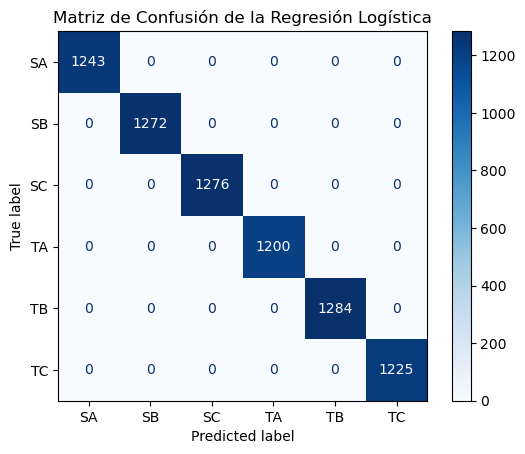

In [41]:
# Graficar la matriz de confusión
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusión de la Regresión Logística')
plt.show()

### SVM

Exactitud del modelo: 100.00%

Reporte de Clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



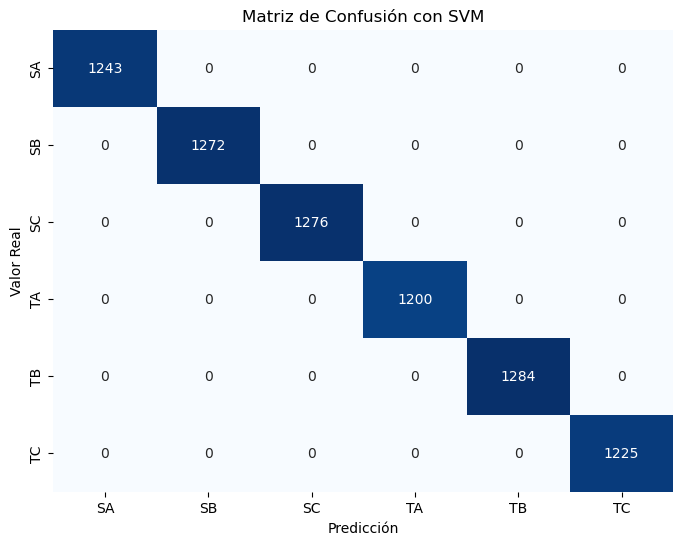

In [18]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Seleccionar solo las columnas numéricas de X
X_numerico = X.select_dtypes(include=['number'])

# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.25, random_state=42)

# Estandarizar las características (recomendado para SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con SVM')
plt.show()


### Random Forest

### Decission Tree

Exactitud del modelo: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



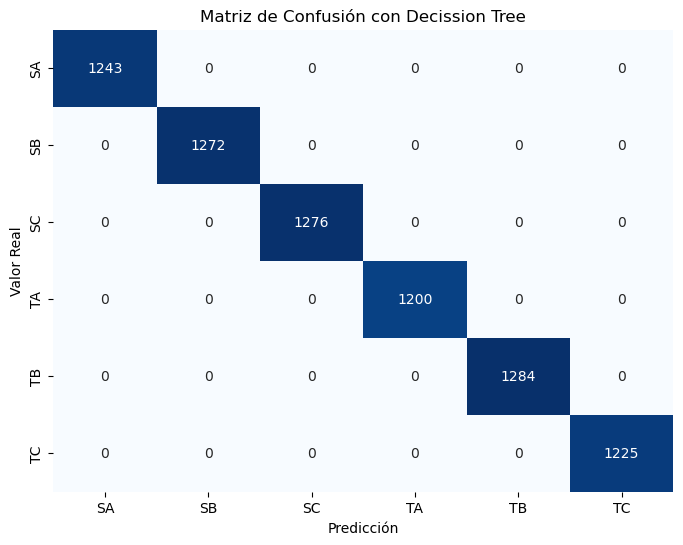

In [19]:
# Seleccionar solo las columnas numéricas de X
X_numerico = X.select_dtypes(include=['number'])

# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = modelo_arbol.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:\n", reporte)

# Obtener predicciones (interpretadas como valores enteros si las clases son numéricas)
y_pred = modelo_arbol.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Decission Tree')
plt.show()

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol, filled=True, rounded=True, feature_names=X_train.columns, class_names=modelo_arbol.classes_)
plt.title("Árbol de Decisión")
plt.show()


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index([' Average  of chlorophyll in the plant (ACHP)',
       ' Plant height rate (PHR)',
       'Average wet weight of the growth vegetative (AWWGV)',
       'Average leaf area of the plant (ALAP)',
       'Average number of plant leaves (ANPL)', 'Average root diameter (ARD)',
       ' Average dry weight of the root (ADWR)',
       ' Percentage of dry matter for vegetative growth (PDMVG)',
       'Average root length (ARL)', 'Average wet weight of the root (AWWR)',
       ' Average dry weight of vegetative plants (ADWV)',
       'Percentage of dry matter for root growth (PDMRG)'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>

In [ ]:
from sklearn.tree import export_text

# Suponiendo que `modelo_arbol` es tu modelo de árbol de decisión
tree_rules = export_text(modelo_arbol, feature_names=list(X_numerico.columns))
print(tree_rules)
print(type(tree_rules))


|---  Percentage of dry matter for vegetative growth (PDMVG) <= 13.76
|   |--- class: TC
|---  Percentage of dry matter for vegetative growth (PDMVG) >  13.76
|   |--- Average leaf area of the plant (ALAP) <= 909.56
|   |   |--- class: TA
|   |--- Average leaf area of the plant (ALAP) >  909.56
|   |   |---  Plant height rate (PHR) <= 73.69
|   |   |   |--- Average root diameter (ARD) <= 17.60
|   |   |   |   |--- Average wet weight of the root (AWWR) <= 2.19
|   |   |   |   |   |--- class: TB
|   |   |   |   |--- Average wet weight of the root (AWWR) >  2.19
|   |   |   |   |   |--- class: SA
|   |   |   |--- Average root diameter (ARD) >  17.60
|   |   |   |   |--- class: SC
|   |   |---  Plant height rate (PHR) >  73.69
|   |   |   |--- class: SB

<class 'str'>


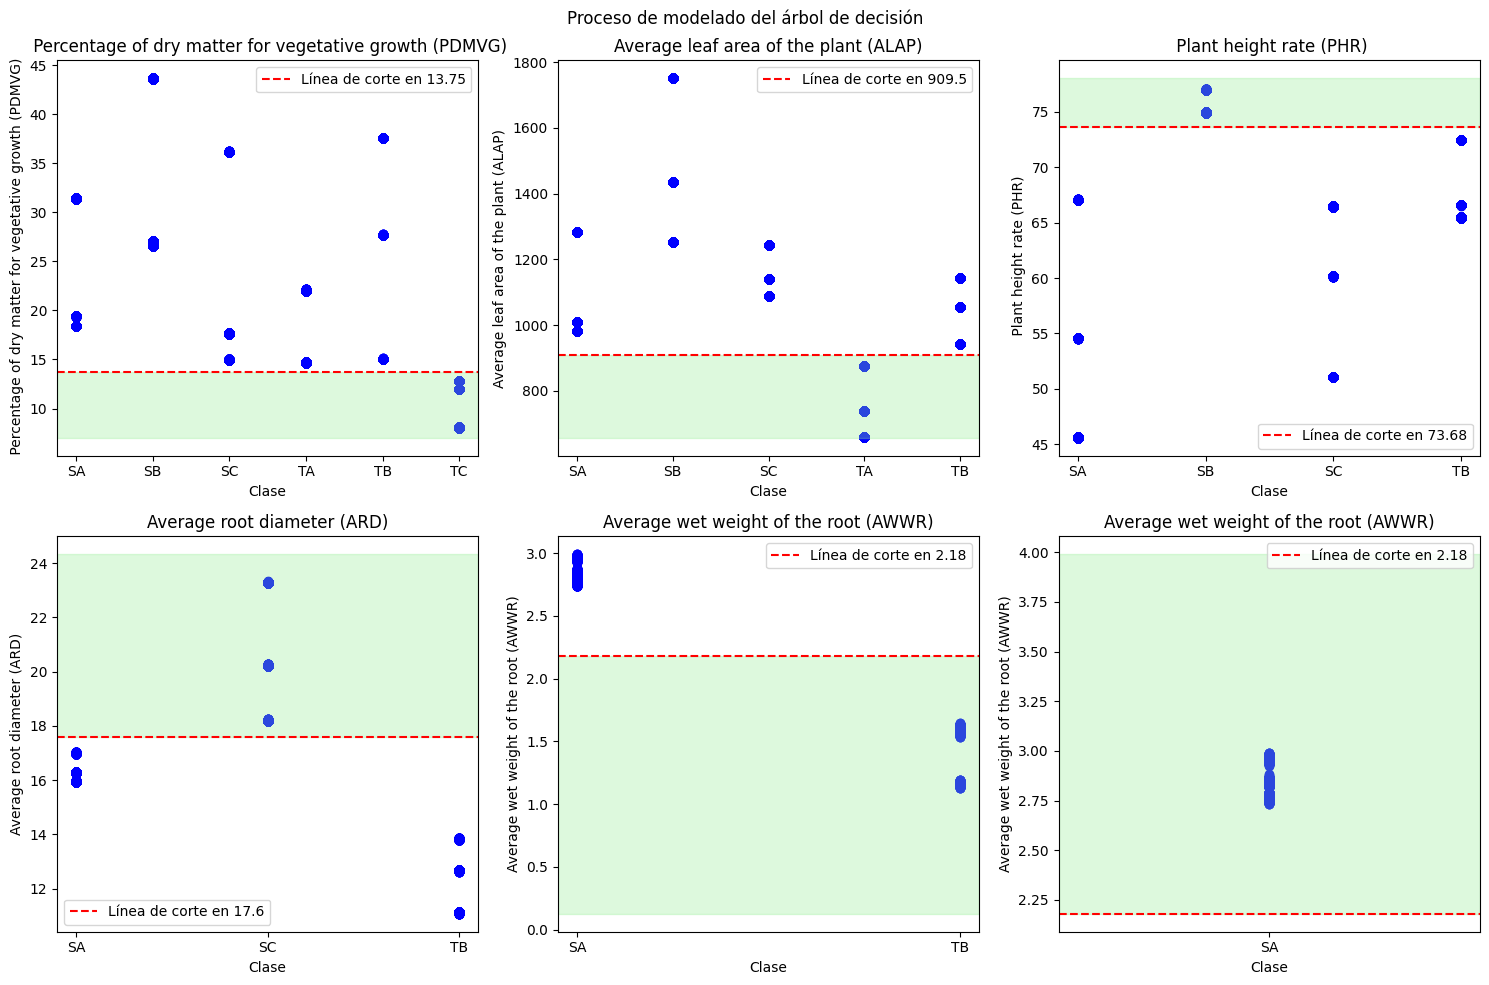

In [ ]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Definir las clases y las columnas de interés junto con los valores de corte
clases = ['TC', 'TA', 'SB', 'SC', 'TB', 'SA']
columnas = [
    ' Percentage of dry matter for vegetative growth (PDMVG)',
    'Average leaf area of the plant (ALAP)',
    ' Plant height rate (PHR)',
    'Average root diameter (ARD)',
    'Average wet weight of the root (AWWR)',
    'Average wet weight of the root (AWWR)'
]
lineas_de_corte = [13.75, 909.5, 73.68, 17.6, 2.18, 2.18]
color_above = [False, False, True, True, False, True]  # True para colorear por encima, False para por debajo


# Crear los scatter plots en cada subplot
for i, ax in enumerate(axs.flat):
    # Filtrar los datos eliminando clases progresivamente
    filtered_data = raw_data[~raw_data['Class'].isin(clases[:i])]
    
    # Scatter plot para la variable correspondiente y datos filtrados
    ax.scatter(filtered_data['Class'], filtered_data[columnas[i]], color='b')
    
    # Línea de corte específica para cada subplot
    corte = lineas_de_corte[i]
    ax.axhline(y=corte, color='r', linestyle='--', label=f'Línea de corte en {corte}')

    # Relleno completo en el fondo del gráfico
    if color_above[i]:  # Colorear por encima de la línea de corte
        ax.axhspan(corte, (filtered_data[columnas[i]].max()+1), color='lightgreen', alpha=0.3)
    else:  # Colorear por debajo de la línea de corte
        ax.axhspan((filtered_data[columnas[i]].min()-1), corte, color='lightgreen', alpha=0.3)

    # Personalización del subplot
    ax.set_xlabel('Clase')
    ax.set_ylabel(columnas[i])
    ax.set_title(f'{columnas[i]}')
    ax.legend()

# Ajustar el layout para evitar superposición de etiquetas
plt.suptitle("Proceso de modelado del árbol de decisión")
plt.tight_layout()
plt.show()


### K-NN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Seleccionar solo las columnas numéricas de X
X_numerico = X.select_dtypes(include=['number'])

# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.25, random_state=42)

# Escalar las características para mejorar el rendimiento de KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo KNN
knn = KNeighborsClassifier(n_neighbors=6)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500


Confusion Matrix:
[[1243    0    0    0    0    0]
 [   0 1272    0    0    0    0]
 [   0    0 1276    0    0    0]
 [   0    0    0 1200    0    0]
 [   0    0    0    0 1284    0]
 [   0    0    0    0    0 1225]]


### UMAP

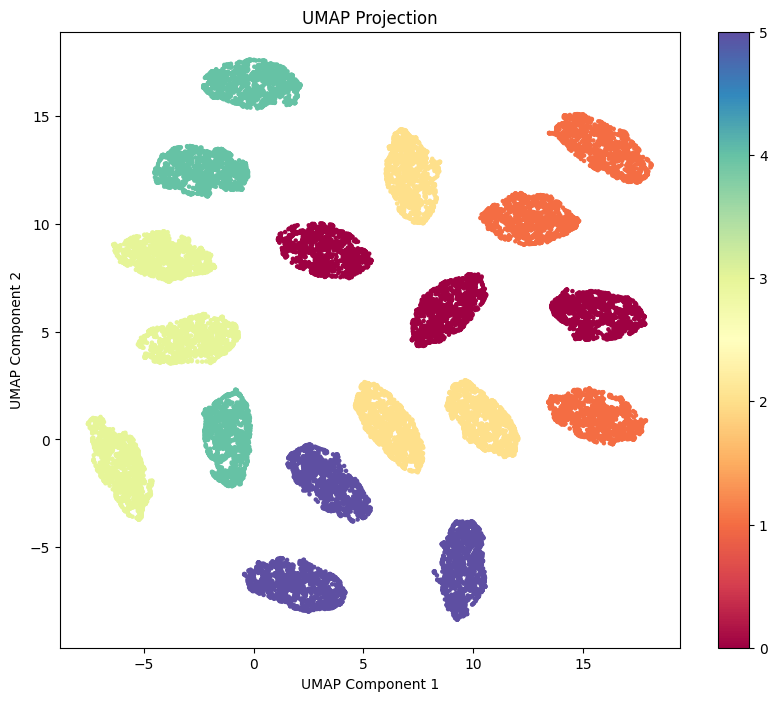

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_numerico)

# Configura UMAP
reducer = umap.UMAP(n_neighbors=6, min_dist=0.1, n_components=2, random_state=42)

# Ajustar UMAP a los datos
embedding = reducer.fit_transform(data_scaled)

# Convertir etiquetas de texto a números, necesario para hacer el gráfico
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_numeric if y_numeric is not None else 'blue', cmap='Spectral', s=5)
plt.colorbar() if y_numeric is not None else None
plt.title('UMAP Projection')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()



### Clustering

#### Jerarquico

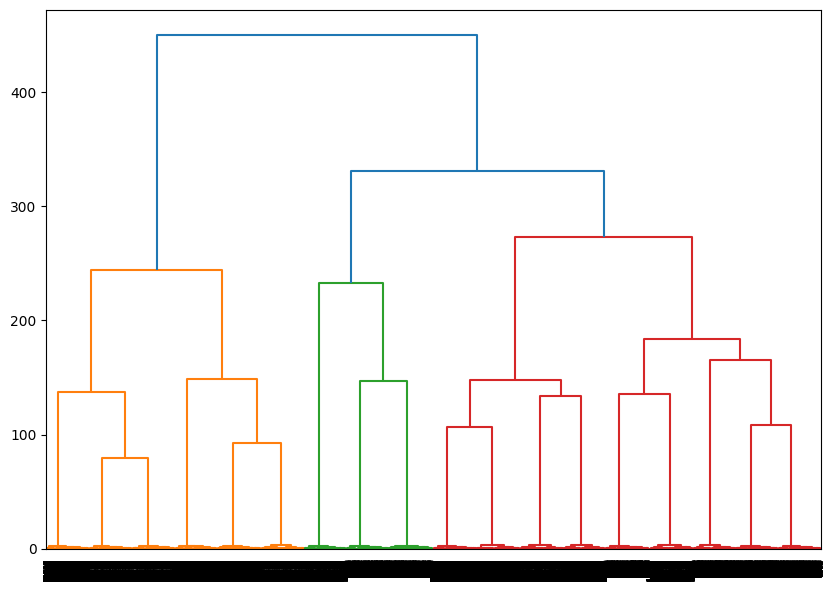

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_numerico_cluster = X.select_dtypes(include=['number'])

# Supongamos que tu dataset es 'df'
df_scaled = StandardScaler().fit_transform(X_numerico_cluster)  # Escalamiento

# Clustering jerárquico usando Ward
Z = linkage(df_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

# Dividir en clusters
clusters = fcluster(Z, 6, criterion='maxclust')
X_numerico_cluster['cluster'] = clusters


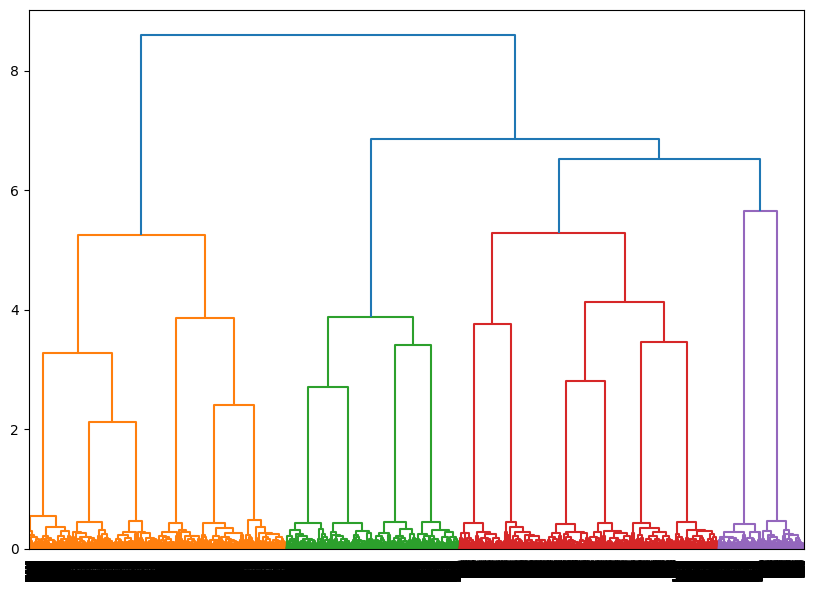

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_numerico_cluster = X.select_dtypes(include=['number'])

# Supongamos que tu dataset es 'df'
df_scaled = StandardScaler().fit_transform(X_numerico_cluster)  # Escalamiento

# Clustering jerárquico usando Ward
Z = linkage(df_scaled, method='complete')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

# Dividir en clusters
clusters = fcluster(Z, 6, criterion='maxclust')
X_numerico_cluster['cluster'] = clusters


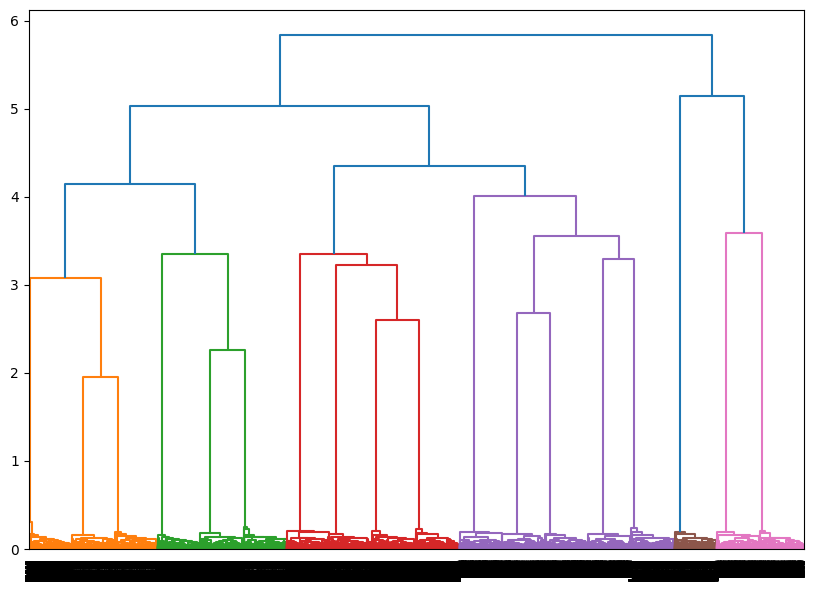

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_numerico_cluster = X.select_dtypes(include=['number'])

# Supongamos que tu dataset es 'df'
df_scaled = StandardScaler().fit_transform(X_numerico_cluster)  # Escalamiento

# Clustering jerárquico usando Ward
Z = linkage(df_scaled, method='average')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

# Dividir en clusters
clusters = fcluster(Z, 6, criterion='maxclust')
X_numerico_cluster['cluster'] = clusters

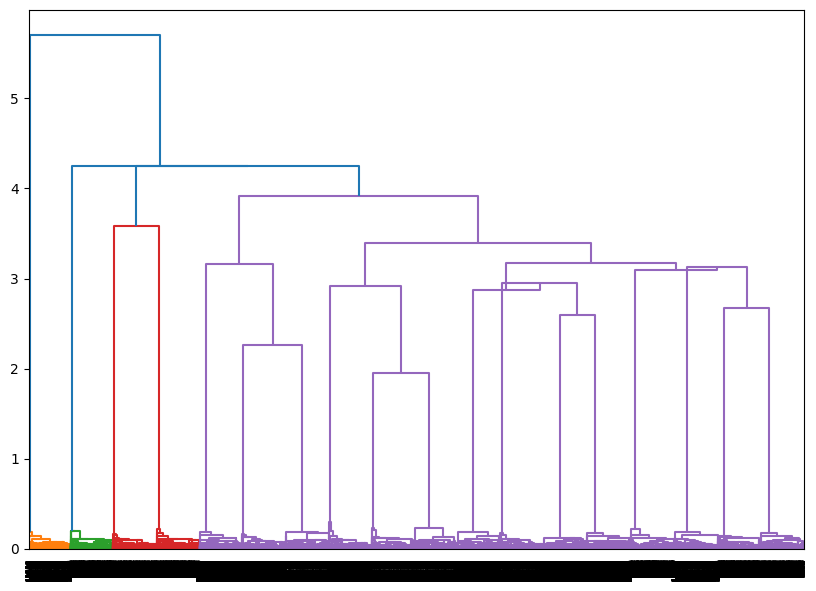

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_numerico_cluster = X.select_dtypes(include=['number'])

# Supongamos que tu dataset es 'df'
df_scaled = StandardScaler().fit_transform(X_numerico_cluster)  # Escalamiento

# Clustering jerárquico usando Ward
Z = linkage(df_scaled, method='centroid')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

# Dividir en clusters
clusters = fcluster(Z, 6, criterion='maxclust')
X_numerico_cluster['cluster'] = clusters

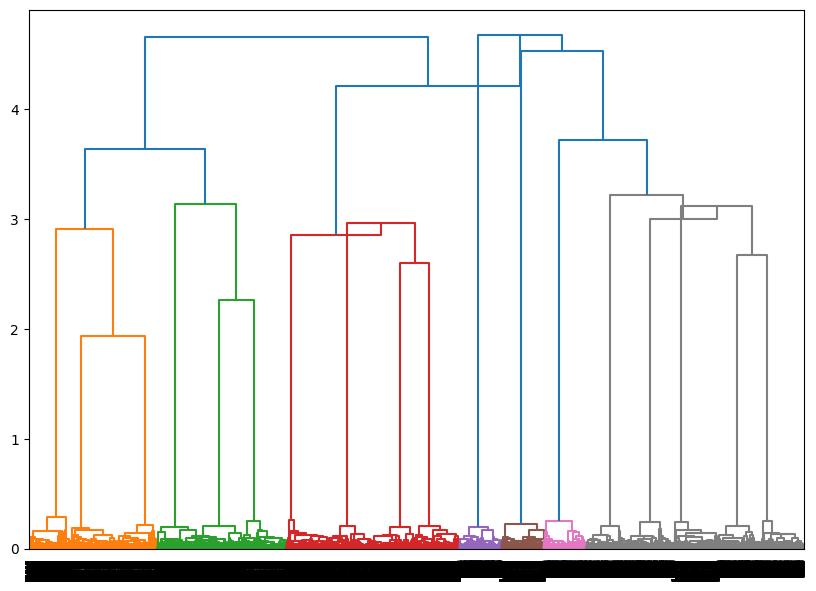

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_numerico_cluster = X.select_dtypes(include=['number'])

# Supongamos que tu dataset es 'df'
df_scaled = StandardScaler().fit_transform(X_numerico_cluster)  # Escalamiento

# Clustering jerárquico usando Ward
Z = linkage(df_scaled, method='median')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

# Dividir en clusters
clusters = fcluster(Z, 6, criterion='maxclust')
X_numerico_cluster['cluster'] = clusters

#### K-means